#Importando as Bibliotecas:

In [143]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

import matplotlib.pyplot as plt
import seaborn as sns

#1ºParte: Coleta de dados e preparação do dataframe:

Interessante notar que cada vez que os comandos abaixo são postos para funcionar, os preços e volumes são constantemente atualizados. Isso gera uma dificuldade, mas também gera uma análise mais precisa que deve considerar a mudança dos preços.

##Fazendo requisição da API da coingecko:

In [144]:
request = requests.get("https://www.coingecko.com/en/nft").text

In [145]:
df = pd.read_html(request)

In [146]:
df1 = df[0]

In [147]:
df1

,#,NFT,Floor Price,24h,7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,Meebits,2.93 ETH,-7.5%,NaN,"58,600.0 ETH","11,006.79 ETH",5750.0,0.0%,20000.0
1,2,dotdotdots,0.194 ETH,-10.7%,NaN,944.78 ETH,"5,342.72 ETH",2654.0,0.2%,4870.0
2,3,Azuki,14.0 ETH,-8.2%,NaN,"140,000.0 ETH",809.84 ETH,5407.0,0.1%,10000.0
3,4,Bored Ape Yacht Club,93.0 ETH,-10.1%,NaN,"930,000.0 ETH",708.88 ETH,6312.0,-0.0%,10000.0
4,5,CloneX,13.45555 ETH,-15.0%,NaN,"254,027.33 ETH",704.94 ETH,8308.0,0.2%,18879.0
5,6,Mutant Ape Yacht Club,17.99 ETH,-10.9%,NaN,"323,118.39 ETH",700.41 ETH,11761.0,0.1%,17961.0
6,7,Metroverse,2.19 ETH,48.2%,NaN,"21,900.0 ETH",542.05 ETH,440.0,-8.5%,10000.0
7,8,LAND,3.6 ETH,-10.0%,NaN,"540,259.2 ETH",452.0 ETH,19758.0,0.2%,150072.0
8,9,Cool Pets,2.1 ETH,-12.4%,NaN,"39,026.4 ETH",375.02 ETH,10567.0,-0.2%,18584.0
9,10,Decentral Games ICE Poker,1.9 ETH,-10.4%,NaN,"27,612.7 ETH",347.6 ETH,3358.0,0.0%,14533.0


- Como eu quero por volta dos últimos 500 NFTs e cada página da coingecko oferece 25 nfts, preciso acessar até a página 20.

In [148]:
dfs = []
for i in range (2, 6):
  request2 = requests.get(f"https://www.coingecko.com/en/nft?page={i}").text
  df = pd.read_html(request2)
  dfs.append(df)

In [149]:
dfs

[[     #                       NFT Floor Price  ...   Owners  24h Owners Total Assets
  0   26                Lazy Lions    1.81 ETH  ...   5045.0       -0.0%      10080.0
  1   27             Capsule House    1.33 ETH  ...   3770.0       -0.2%      10000.0
  2   28  Sneaky Vampire Syndicate    1.35 ETH  ...   1372.0        0.2%       8888.0
  3   29                 MekaVerse  1.0479 ETH  ...   5036.0        0.1%       8888.0
  4   30              DuskBreakers    0.28 ETH  ...   2900.0       -0.8%      10000.0
  5   31                VeeFriends    14.2 ETH  ...   5213.0       -0.0%      10255.0
  6   32           Adam Bomb Squad     0.7 ETH  ...   8668.0        0.1%      24999.0
  7   33            Lives of Asuna    0.26 ETH  ...   6122.0       -0.3%      10000.0
  8   34                  Smilesss     1.4 ETH  ...   4520.0       -0.1%       8733.0
  9   35            Creature World    1.15 ETH  ...   6216.0        0.2%      10000.0
  10  36            FVCK_CRYSTAL//    2.39 ETH  ...   

In [150]:
len(dfs)

4

In [151]:
datasets = []
for i in range(len(dfs)):
  datasets.append(dfs[i][0])

In [152]:
len(datasets)

4

In [153]:
df_final = pd.concat([df1, datasets[0], datasets[1], datasets[2], datasets[3]], ignore_index=True)

In [154]:
df_final

,#,NFT,Floor Price,24h,7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,Meebits,2.93 ETH,-7.5%,NaN,"58,600.0 ETH","11,006.79 ETH",5750.0,0.0%,20000.0
1,2,dotdotdots,0.194 ETH,-10.7%,NaN,944.78 ETH,"5,342.72 ETH",2654.0,0.2%,4870.0
2,3,Azuki,14.0 ETH,-8.2%,NaN,"140,000.0 ETH",809.84 ETH,5407.0,0.1%,10000.0
3,4,Bored Ape Yacht Club,93.0 ETH,-10.1%,NaN,"930,000.0 ETH",708.88 ETH,6312.0,-0.0%,10000.0
4,5,CloneX,13.45555 ETH,-15.0%,NaN,"254,027.33 ETH",704.94 ETH,8308.0,0.2%,18879.0
...,...,...,...,...,...,...,...,...,...,...
120,121,Dark Super Bunnies,0.019 ETH,-82.5%,NaN,83.77 ETH,0.1 ETH,1738.0,-0.1%,4409.0
121,122,Generative Masks,0.08 ETH,-22.4%,NaN,799.92 ETH,0.1 ETH,3461.0,0.2%,9999.0
122,123,Dope Shibas,0.0111 ETH,-55.8%,NaN,109.88 ETH,0.09 ETH,4002.0,0.1%,9899.0
123,124,Angry Apes United,0.035 ETH,-7.8%,NaN,311.08 ETH,0.06 ETH,4944.0,0.0%,8888.0


###Floor Price:

In [155]:
df_final['Floor Price']

0          2.93 ETH
1         0.194 ETH
2          14.0 ETH
3          93.0 ETH
4      13.45555 ETH
           ...     
120       0.019 ETH
121        0.08 ETH
122      0.0111 ETH
123       0.035 ETH
124      0.0199 ETH
Name: Floor Price, Length: 125, dtype: object

In [156]:
prices = []
for price in df_final['Floor Price']:
  price = price.split()
  if price[0] == 'ETH':
    print('ok')
  if len(price[0]) == 0:
    print('ok')
  prices.append(price[0])


In [157]:
df_final['Floor Price'] = prices

In [158]:
df_final['Floor Price']

0          2.93
1         0.194
2          14.0
3          93.0
4      13.45555
         ...   
120       0.019
121        0.08
122      0.0111
123       0.035
124      0.0199
Name: Floor Price, Length: 125, dtype: object

In [159]:
df_final['Floor Price'] = df_final['Floor Price'].astype(float)

###Market Cap:

In [160]:
df_final['Market Cap']

0        58,600.0 ETH
1          944.78 ETH
2       140,000.0 ETH
3       930,000.0 ETH
4      254,027.33 ETH
            ...      
120         83.77 ETH
121        799.92 ETH
122        109.88 ETH
123        311.08 ETH
124          99.5 ETH
Name: Market Cap, Length: 125, dtype: object

In [161]:
market_caps = []
for market_cap in df_final['Market Cap']:
  market_cap = market_cap.split()
  market_caps.append(market_cap[0])

In [162]:
for i in market_caps:
  if type(i) != type('str'):
    print('Não tem dados com tipo string')

In [163]:
market_caps_final = []
for mks in market_caps:
  mks = mks.split(',')
  if len(mks) > 1:
    mks = mks[0] + '' + mks[1]
    market_caps_final.append(mks)
  else:
    market_caps_final.append(mks[0])


In [164]:
df_final['Market Cap'] = market_caps_final

In [165]:
market_caps_final = df_final['Market Cap'].astype(float)

###24h(Variação em %):

In [166]:
df_final = df_final.rename(columns={'24h':'24h(%)'})

In [167]:
df_final.head()

,#,NFT,Floor Price,24h(%),7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,Meebits,2.93000,-7.5%,NaN,58600.0,"11,006.79 ETH",5750.0,0.0%,20000.0
1,2,dotdotdots,0.19400,-10.7%,NaN,944.78,"5,342.72 ETH",2654.0,0.2%,4870.0
2,3,Azuki,14.00000,-8.2%,NaN,140000.0,809.84 ETH,5407.0,0.1%,10000.0
3,4,Bored Ape Yacht Club,93.00000,-10.1%,NaN,930000.0,708.88 ETH,6312.0,-0.0%,10000.0
4,5,CloneX,13.45555,-15.0%,NaN,254027.33,704.94 ETH,8308.0,0.2%,18879.0


In [168]:
tfhours = []
try:
  for per in df_final['24h(%)']:
    per = per.split('%')
    tfhours.append(float(per[0]))
except:
  print("not valid")

In [169]:
if len(tfhours) > 0:
  df_final['24h(%)'] = tfhours

In [170]:
df_final.head()

,#,NFT,Floor Price,24h(%),7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,Meebits,2.93000,-7.5,NaN,58600.0,"11,006.79 ETH",5750.0,0.0%,20000.0
1,2,dotdotdots,0.19400,-10.7,NaN,944.78,"5,342.72 ETH",2654.0,0.2%,4870.0
2,3,Azuki,14.00000,-8.2,NaN,140000.0,809.84 ETH,5407.0,0.1%,10000.0
3,4,Bored Ape Yacht Club,93.00000,-10.1,NaN,930000.0,708.88 ETH,6312.0,-0.0%,10000.0
4,5,CloneX,13.45555,-15.0,NaN,254027.33,704.94 ETH,8308.0,0.2%,18879.0


###24h Volume:

In [171]:
df_final['24h Volume']

0      11,006.79 ETH
1       5,342.72 ETH
2         809.84 ETH
3         708.88 ETH
4         704.94 ETH
           ...      
120          0.1 ETH
121          0.1 ETH
122         0.09 ETH
123         0.06 ETH
124         0.05 ETH
Name: 24h Volume, Length: 125, dtype: object

In [172]:
daily_volumes  = []
for daily_volume in df_final['24h Volume']:
  if ',' in daily_volume:
    daily_volume = daily_volume.split(',')
    daily_volume = daily_volume[0] + '' + daily_volume[1]
    daily_volume = daily_volume.split()
    daily_volumes.append(daily_volume[0])
  else:  
    daily_volume = daily_volume.split()
    daily_volume = daily_volume[0]
    daily_volumes.append(daily_volume)


In [173]:
daily_volumes
    

['11006.79',
 '5342.72',
 '809.84',
 '708.88',
 '704.94',
 '700.41',
 '542.05',
 '452.0',
 '375.02',
 '347.6',
 '343.13',
 '267.42',
 '213.13',
 '151.45',
 '131.83',
 '106.48',
 '90.31',
 '83.49',
 '81.27',
 '69.17',
 '52.82',
 '51.94',
 '47.48',
 '43.81',
 '43.52',
 '43.29',
 '41.9',
 '41.53',
 '39.41',
 '35.86',
 '35.0',
 '32.36',
 '31.44',
 '29.89',
 '29.3',
 '29.11',
 '28.99',
 '28.92',
 '28.5',
 '27.85',
 '27.82',
 '27.08',
 '25.38',
 '23.39',
 '23.11',
 '22.26',
 '21.3',
 '20.67',
 '18.97',
 '18.24',
 '16.49',
 '16.04',
 '14.69',
 '10.86',
 '10.48',
 '9.88',
 '9.5',
 '8.25',
 '7.85',
 '7.76',
 '6.23',
 '6.0',
 '5.79',
 '5.7',
 '5.6',
 '4.72',
 '4.68',
 '4.52',
 '4.4',
 '3.8',
 '3.77',
 '3.47',
 '3.32',
 '3.27',
 '3.05',
 '2.98',
 '2.97',
 '2.62',
 '2.41',
 '1.93',
 '1.84',
 '1.76',
 '1.75',
 '1.68',
 '1.57',
 '1.56',
 '1.36',
 '1.36',
 '1.3',
 '1.2',
 '1.19',
 '1.19',
 '1.15',
 '0.99',
 '0.93',
 '0.85',
 '0.81',
 '0.76',
 '0.72',
 '0.7',
 '0.61',
 '0.57',
 '0.49',
 '0.45',
 '0.4'

In [174]:
df_final['24h Volume'] = daily_volumes

In [175]:
df_final['24h Volume'].astype(float)

0      11006.79
1       5342.72
2        809.84
3        708.88
4        704.94
         ...   
120        0.10
121        0.10
122        0.09
123        0.06
124        0.05
Name: 24h Volume, Length: 125, dtype: float64

###24h Owners:

In [176]:
df_final['24h Owners']

0       0.0%
1       0.2%
2       0.1%
3      -0.0%
4       0.2%
       ...  
120    -0.1%
121     0.2%
122     0.1%
123     0.0%
124     0.1%
Name: 24h Owners, Length: 125, dtype: object

In [177]:
daily_owners = []
for d_owner in df_final['24h Owners']:
  d_owner = d_owner.split('%')
  daily_owners.append(d_owner[0])

In [178]:
df_final['24h Owners'] = daily_owners

In [179]:
len(daily_owners)

125

In [180]:
for els in df_final['24h Owners']:
  if type(els) != type('str'):
    df_final['24h Owners'].astype(float)

##Razão dos proprietários (Owner Ratio):

In [181]:
df_final['Owner Ratio'] = df_final['Owners'] / df_final ['Total Assets']

In [182]:
df_final['Owner Ratio'] = df_final['Owner Ratio']*100

#2ºParte: Limpeza dos dados

In [183]:
df_final.isnull().sum()

#                 0
NFT               0
Floor Price       0
24h(%)            0
7d              125
Market Cap        0
24h Volume        0
Owners            0
24h Owners        0
Total Assets      0
Owner Ratio       0
dtype: int64

In [184]:
df_final.drop(columns=["7d", "#"], inplace=True)

In [185]:
df_final.duplicated().sum()

0

In [186]:
df = df_final

#Salvando em CSV:

In [187]:
df.to_csv(r'/content/df_final.csv', index=False, header=True)

In [188]:
df_test = pd.read_csv("df_final.csv")

In [189]:
df_test.head()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,Meebits,2.93000,-7.5,58600.00,11006.79,5750.0,0.0,20000.0,28.750000
1,dotdotdots,0.19400,-10.7,944.78,5342.72,2654.0,0.2,4870.0,54.496920
2,Azuki,14.00000,-8.2,140000.00,809.84,5407.0,0.1,10000.0,54.070000
3,Bored Ape Yacht Club,93.00000,-10.1,930000.00,708.88,6312.0,-0.0,10000.0,63.120000
4,CloneX,13.45555,-15.0,254027.33,704.94,8308.0,0.2,18879.0,44.006568


#A continuação das partes será imediata para aproveitar a sincronicidade via API do dataset. No entanto, deixo o dataset salvo pós-tratamento para qualquer motivo que seja.

#3ºParte: Análise do dataframe




##Importando as bibliotecas:

In [190]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

##Importando o dataset:

In [191]:
df = pd.read_csv("df_final_sample.csv")


In [192]:
df = df_final.copy()

##Quais colunas nos interessam?

In [193]:
df.columns

Index(['NFT', 'Floor Price', '24h(%)', 'Market Cap', '24h Volume', 'Owners',
       '24h Owners', 'Total Assets', 'Owner Ratio'],
      dtype='object')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NFT           125 non-null    object 
 1   Floor Price   125 non-null    float64
 2   24h(%)        125 non-null    float64
 3   Market Cap    125 non-null    object 
 4   24h Volume    125 non-null    object 
 5   Owners        125 non-null    float64
 6   24h Owners    125 non-null    object 
 7   Total Assets  125 non-null    float64
 8   Owner Ratio   125 non-null    float64
dtypes: float64(5), object(4)
memory usage: 8.9+ KB


In [195]:
df.head()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,Meebits,2.93000,-7.5,58600.0,11006.79,5750.0,0.0,20000.0,28.750000
1,dotdotdots,0.19400,-10.7,944.78,5342.72,2654.0,0.2,4870.0,54.496920
2,Azuki,14.00000,-8.2,140000.0,809.84,5407.0,0.1,10000.0,54.070000
3,Bored Ape Yacht Club,93.00000,-10.1,930000.0,708.88,6312.0,-0.0,10000.0,63.120000
4,CloneX,13.45555,-15.0,254027.33,704.94,8308.0,0.2,18879.0,44.006568


In [196]:
df.tail()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
120,Dark Super Bunnies,0.0190,-82.5,83.77,0.1,1738.0,-0.1,4409.0,39.419369
121,Generative Masks,0.0800,-22.4,799.92,0.1,3461.0,0.2,9999.0,34.613461
122,Dope Shibas,0.0111,-55.8,109.88,0.09,4002.0,0.1,9899.0,40.428326
123,Angry Apes United,0.0350,-7.8,311.08,0.06,4944.0,0.0,8888.0,55.625563
124,MOONDOGS ODYSSEY,0.0199,-1.4,99.5,0.05,1930.0,0.1,5000.0,38.600000


In [197]:
df.corr(method="pearson")

,Floor Price,24h(%),Owners,Total Assets,Owner Ratio
Floor Price,1.000000,0.016634,0.081550,0.014322,-0.023378
24h(%),0.016634,1.000000,-0.013083,0.021163,-0.261760
Owners,0.081550,-0.013083,1.000000,0.470415,0.026337
Total Assets,0.014322,0.021163,0.470415,1.000000,-0.077112
Owner Ratio,-0.023378,-0.261760,0.026337,-0.077112,1.000000


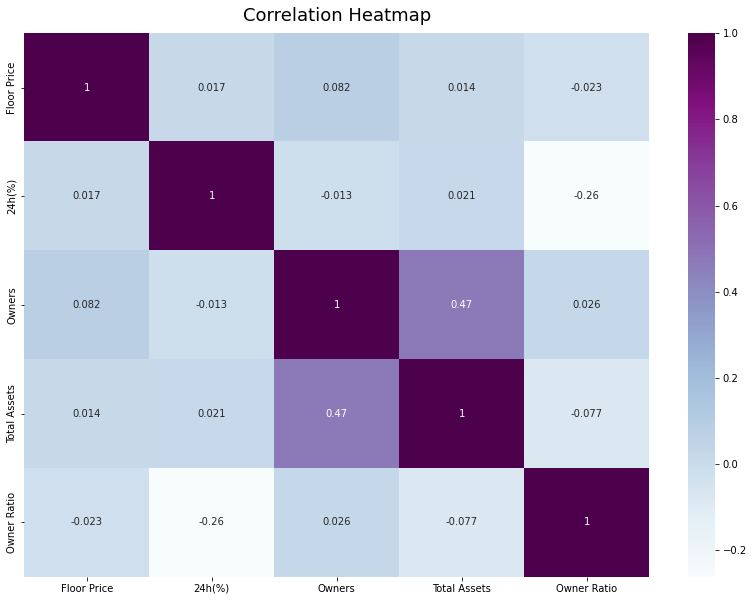

In [198]:
plt.figure(figsize=(14,10))
heatmap = sns.heatmap(df.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

##Análise de cada coluna:

###Floor Price:

In [199]:
df['Floor Price']

0       2.93000
1       0.19400
2      14.00000
3      93.00000
4      13.45555
         ...   
120     0.01900
121     0.08000
122     0.01110
123     0.03500
124     0.01990
Name: Floor Price, Length: 125, dtype: float64

In [200]:
df['Floor Price'].describe()

count    125.000000
mean       2.975153
std       10.606158
min        0.011100
25%        0.100000
50%        0.387000
75%        1.620000
max       93.000000
Name: Floor Price, dtype: float64

In [201]:
df2 = df[df['Floor Price'] < 80]

In [202]:
df2['Floor Price'].describe()

count    124.000000
mean       2.249146
std        6.854469
min        0.011100
25%        0.099625
50%        0.368500
75%        1.492500
max       67.950000
Name: Floor Price, dtype: float64

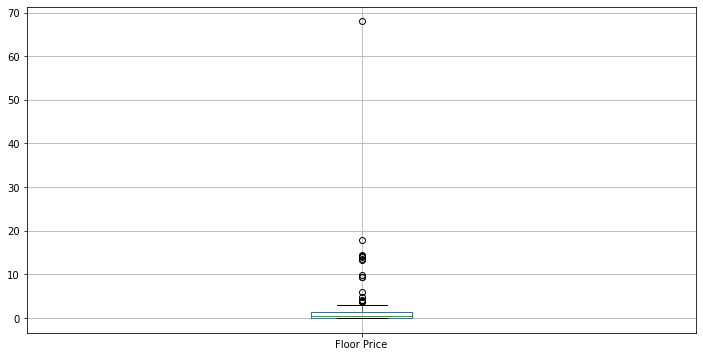

In [203]:
plt.figure(figsize=(12,6))
df2.boxplot('Floor Price')
plt.show()

- Os dados estão concentrados por volta de 0 e 5 ETH. O que nos indica lançamentos baixos, exceto por alguns outliers discrepantes.

####Visualização dos dados:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


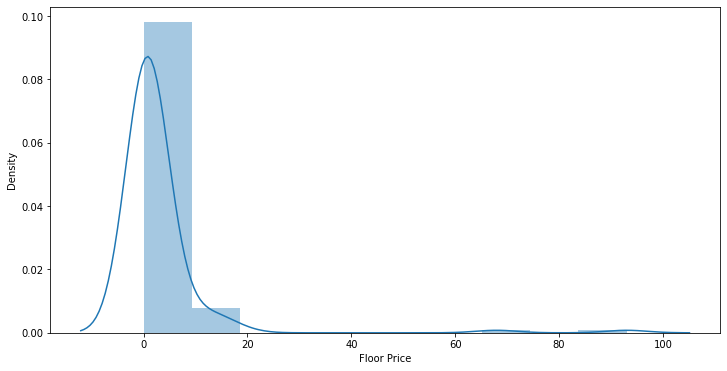

In [204]:
plt.figure(figsize=(12,6))
sns.distplot(df['Floor Price'], bins=10)

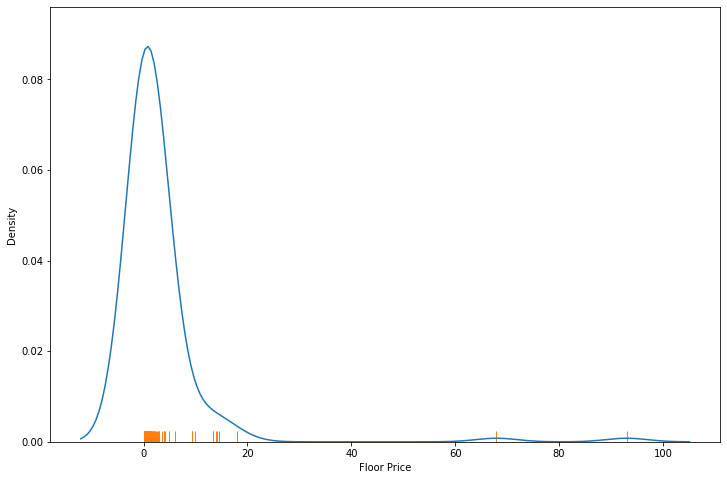

In [205]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Floor Price'])
sns.rugplot(df['Floor Price'])

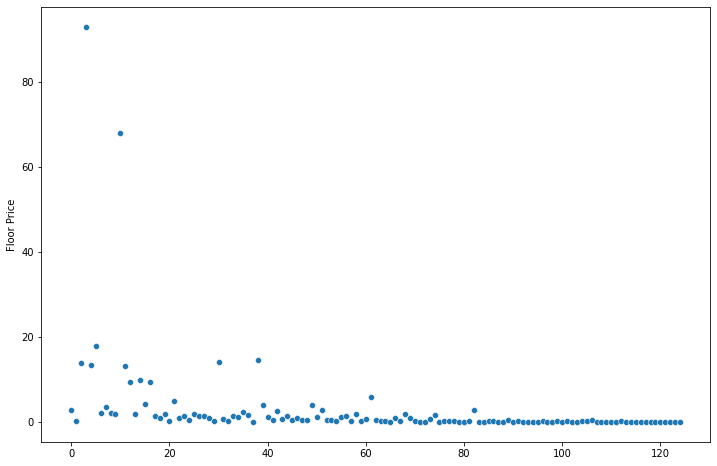

In [206]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Floor Price'])

###Variação nas últimas 24 horas:

- Essa coluna não nos informa muito sobre o dataset de um modo geral, visto que para termos uma informação de qualidade, sempre terá de ser dinâmica a relação mética fornecida nessa coluna, por isso as informações de estatística descritiva serão suficiente

In [207]:
df['24h(%)']

0      -7.5
1     -10.7
2      -8.2
3     -10.1
4     -15.0
       ... 
120   -82.5
121   -22.4
122   -55.8
123    -7.8
124    -1.4
Name: 24h(%), Length: 125, dtype: float64

In [208]:
df[df['24h(%)'] == 904]

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio


- É possível sabermos os NFTs que tem um crescimento nas últimas 24 horas acima da média:

In [209]:
df_mean24h = df[df['24h(%)'] > df['24h(%)'].mean() ]

In [210]:
df_mean24h.describe()

,Floor Price,24h(%),Owners,Total Assets,Owner Ratio
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,4.258588,-3.460870,3957.304348,10813.086957,226.914651
std,13.896720,11.218462,4556.773308,17856.780886,1121.918300
min,0.019900,-10.100000,56.000000,4.000000,2.770905
25%,0.140000,-8.600000,1894.000000,5000.000000,30.140000
50%,0.580000,-7.600000,3391.000000,9811.000000,39.400000
75%,1.940000,-3.400000,5045.000000,10000.000000,50.833740
max,93.000000,53.000000,32794.000000,150072.000000,7789.548694


Essas informações são bem interessantes:
- Se olhar o count do df_mean24h['Floor Price'], veremos que X NFTs dos 125 tem crescimento das últimas 24 horas acima da média
- Assim como mean do df_mean24h['Floor Price'] nos indicará Y ETH é a média do Floor Price

####Visualização de dados:

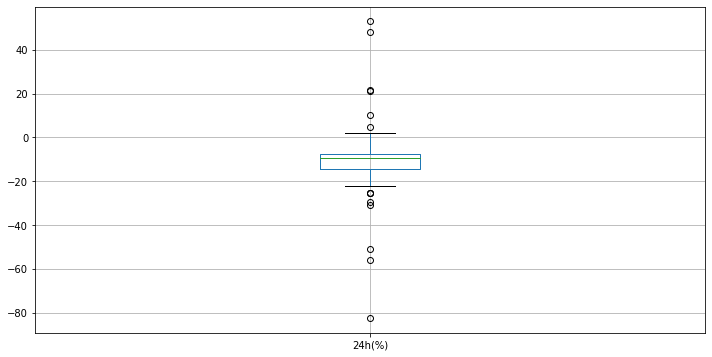

In [211]:
plt.figure(figsize=(12,6))
df.boxplot('24h(%)')
plt.show()

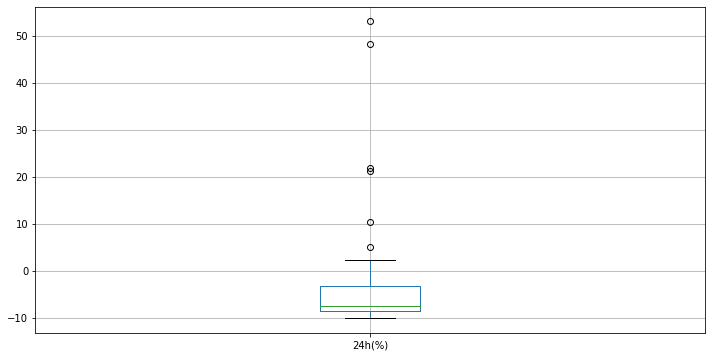

In [212]:
plt.figure(figsize=(12,6))
df_mean24h.boxplot('24h(%)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


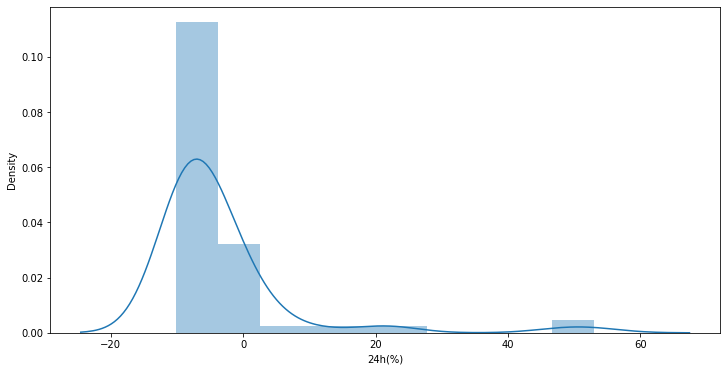

In [213]:
plt.figure(figsize=(12,6))
sns.distplot(df_mean24h['24h(%)'], bins=10)

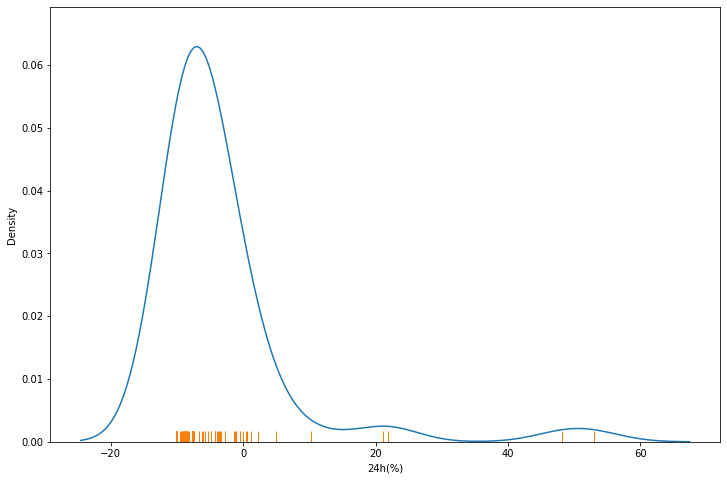

In [214]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_mean24h['24h(%)'])
sns.rugplot(df_mean24h['24h(%)'])

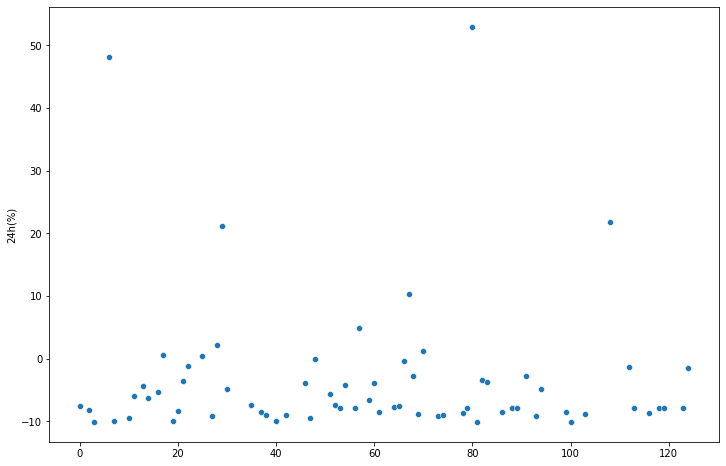

In [215]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_mean24h['24h(%)'])

- O Floor Price desses projetos com crescimento acima da média:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


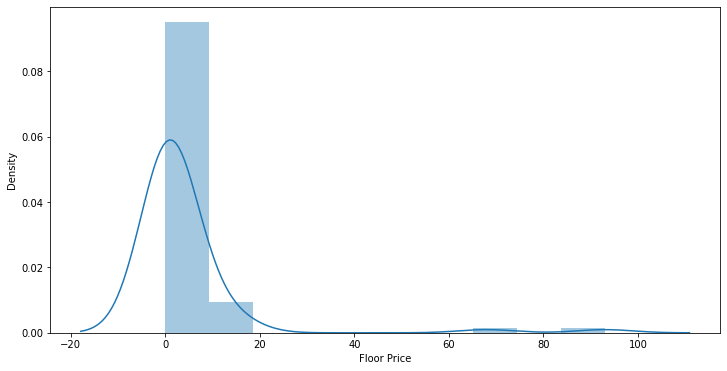

In [216]:
plt.figure(figsize=(12,6))
sns.distplot(df_mean24h['Floor Price'], bins=10)

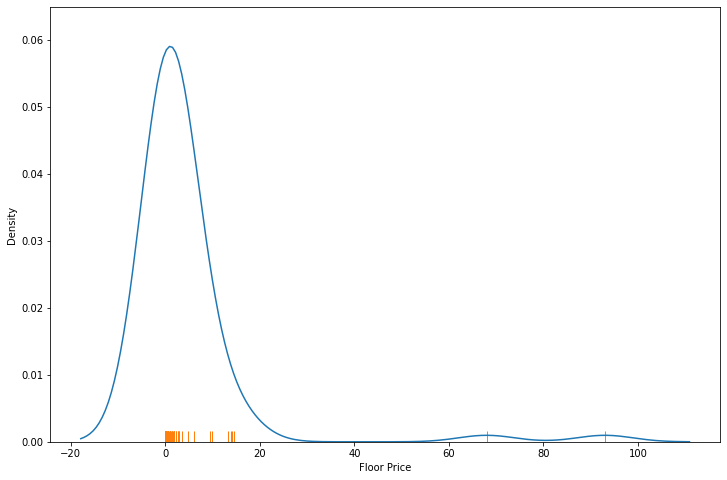

In [217]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_mean24h['Floor Price'])
sns.rugplot(df_mean24h['Floor Price'])

###Market Cap:

In [218]:
df['Market Cap'] = df['Market Cap'].astype(float)

In [219]:
df['Market Cap'].describe()

count       125.000000
mean      33499.154720
std      118588.437978
min           1.320000
25%         790.000000
50%        2600.000000
75%       13962.800000
max      930000.000000
Name: Market Cap, dtype: float64

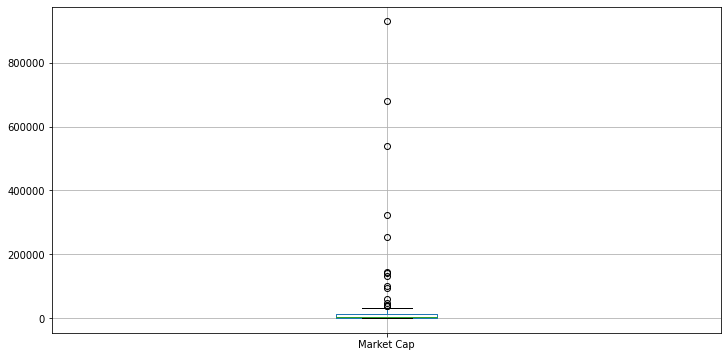

In [220]:
plt.figure(figsize=(12,6))
df.boxplot('Market Cap')
plt.show()

####Visualização de dados:

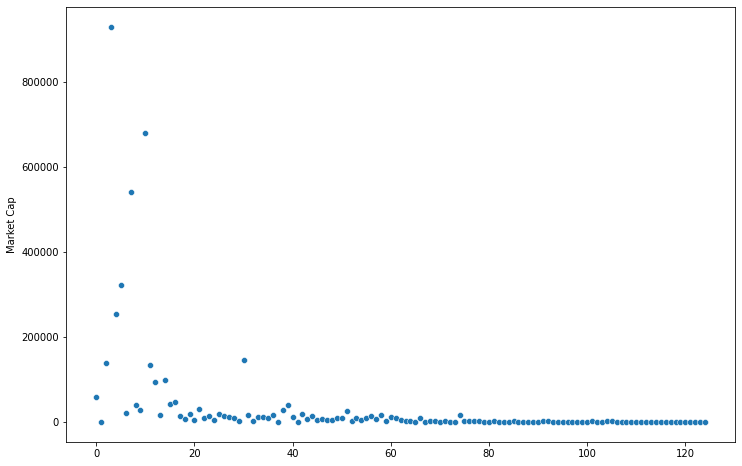

In [221]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Market Cap'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


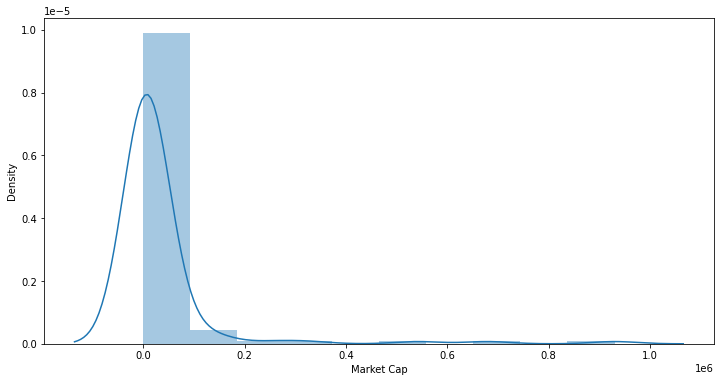

In [222]:
plt.figure(figsize=(12,6))
sns.distplot(df['Market Cap'], bins=10)

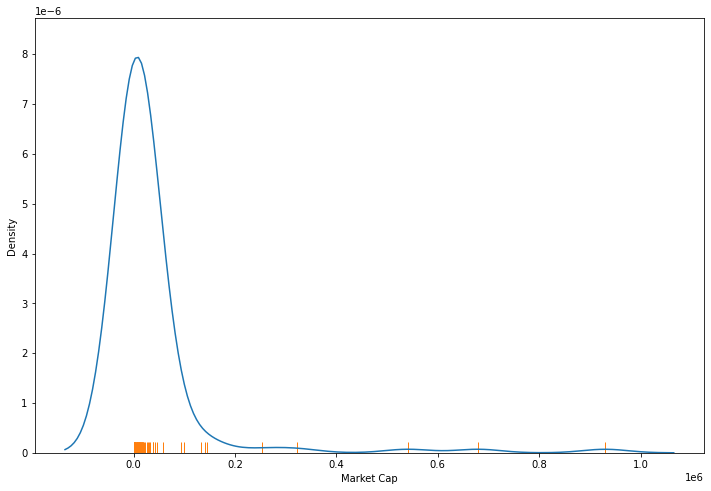

In [223]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Market Cap'])
sns.rugplot(df['Market Cap'])

In [224]:
df[df['Market Cap'] < 13587].describe()

,Floor Price,24h(%),Market Cap,Owners,Total Assets,Owner Ratio
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.498826,-10.808602,3124.577849,3541.967742,8882.612903,1199.077217
std,0.855802,14.468945,3797.509175,3578.051353,6567.747993,9866.036229
min,0.011100,-82.500000,1.320000,213.000000,3.000000,6.013912
25%,0.079000,-14.400000,440.100000,1863.000000,5000.000000,31.411118
50%,0.190000,-10.000000,1244.320000,3112.000000,8888.000000,39.419369
75%,0.580000,-7.600000,4510.660000,4400.000000,10000.000000,50.694444
max,6.000000,53.000000,13300.000000,32794.000000,46169.000000,94866.666667


In [225]:
df_cap = df[df['Market Cap'] < 13587]

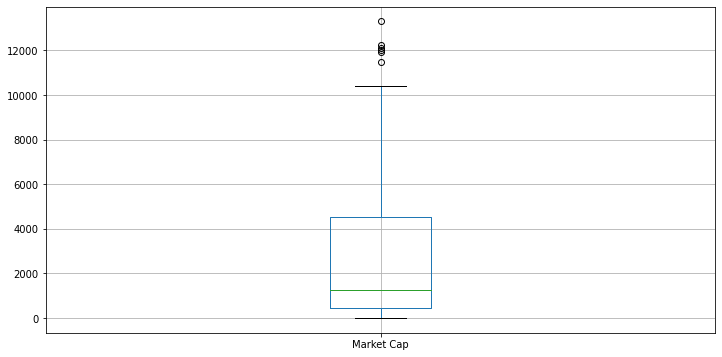

In [226]:
plt.figure(figsize=(12,6))
df_cap.boxplot('Market Cap')
plt.show()

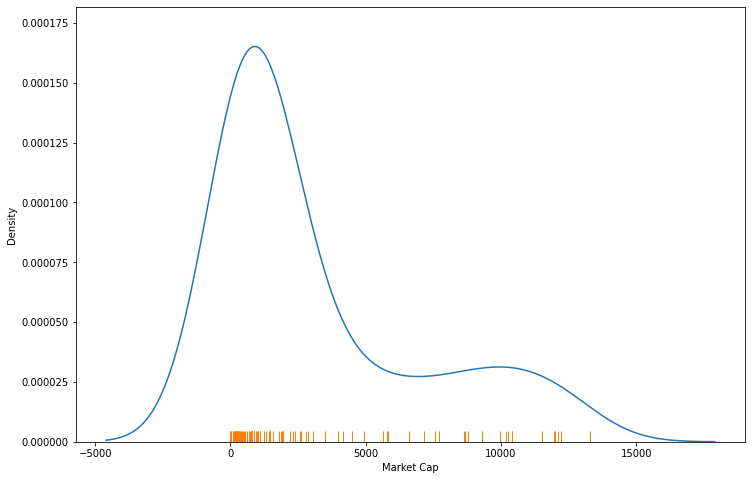

In [227]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_cap['Market Cap'])
sns.rugplot(df_cap['Market Cap'])

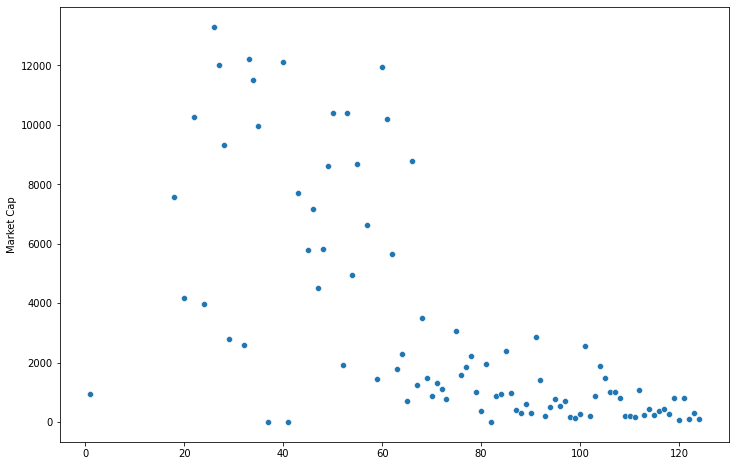

In [228]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_cap['Market Cap'])

###Owners

In [229]:
df['Owners'].head()

0    5750.0
1    2654.0
2    5407.0
3    6312.0
4    8308.0
Name: Owners, dtype: float64

In [230]:
df['Owners'].tail()

120    1738.0
121    3461.0
122    4002.0
123    4944.0
124    1930.0
Name: Owners, dtype: float64

In [231]:
df['Owners'].describe()

count      125.000000
mean      3927.408000
std       3701.997761
min         56.000000
25%       2084.000000
50%       3405.000000
75%       5045.000000
max      32794.000000
Name: Owners, dtype: float64

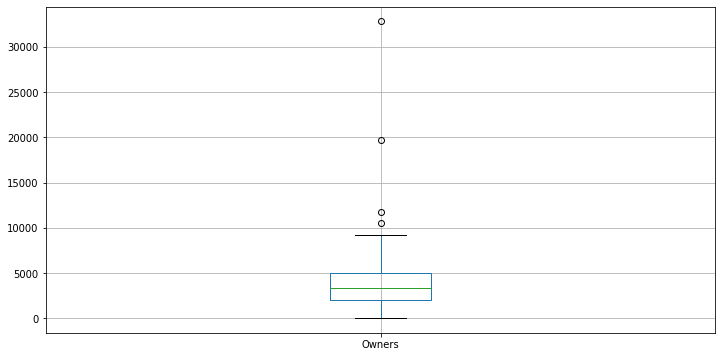

In [232]:
plt.figure(figsize=(12,6))
df.boxplot('Owners')
plt.show()

####Visualizações de dados:

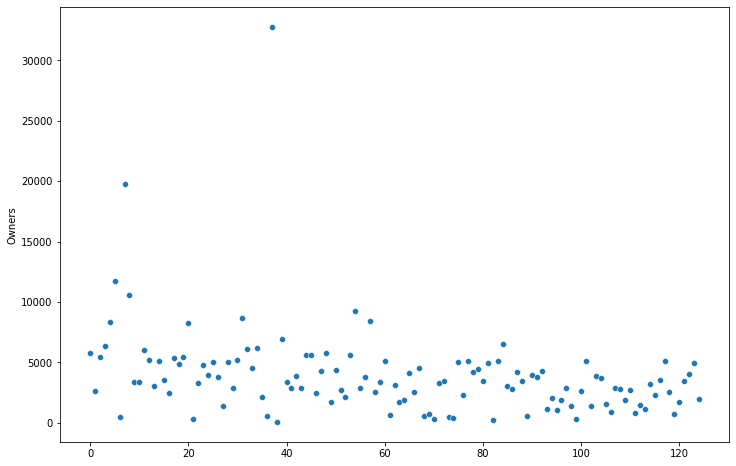

In [233]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Owners'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


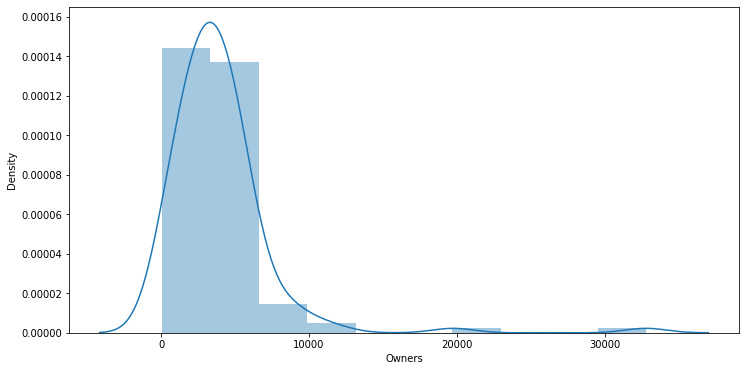

In [234]:
plt.figure(figsize=(12,6))
sns.distplot(df["Owners"], bins=10)

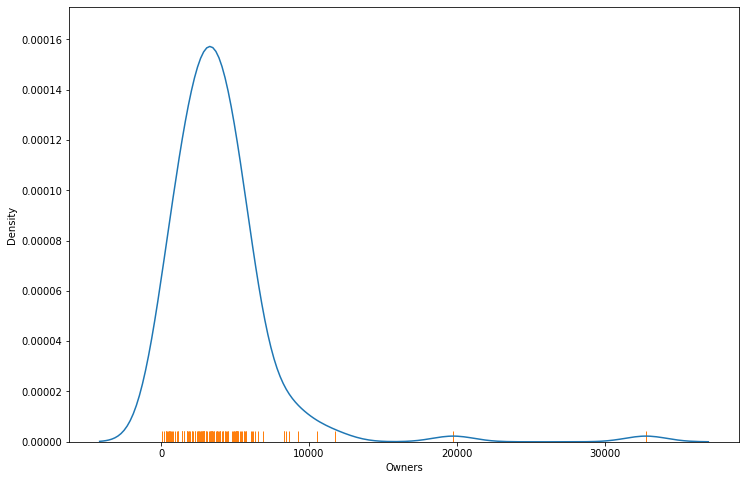

In [235]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Owners'])
sns.rugplot(df['Owners'])

###Total Assets

In [236]:
df['Total Assets'].head()

0    20000.0
1     4870.0
2    10000.0
3    10000.0
4    18879.0
Name: Total Assets, dtype: float64

In [237]:
df['Total Assets'].tail()

120    4409.0
121    9999.0
122    9899.0
123    8888.0
124    5000.0
Name: Total Assets, dtype: float64

In [238]:
df['Total Assets'].describe()

count       125.000000
mean      10549.976000
std       14011.583941
min           3.000000
25%        6942.000000
50%        9999.000000
75%       10000.000000
max      150072.000000
Name: Total Assets, dtype: float64

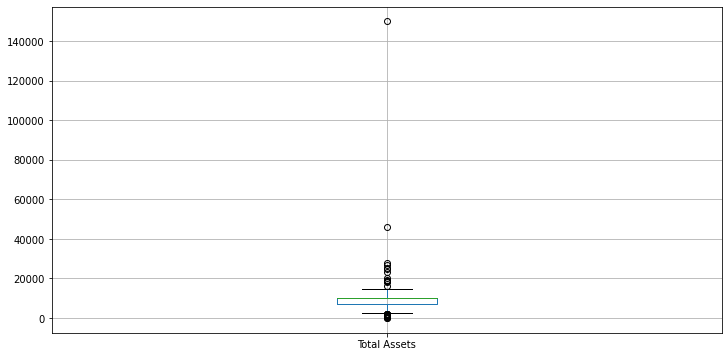

In [239]:
plt.figure(figsize=(12,6))
df.boxplot('Total Assets')
plt.show()

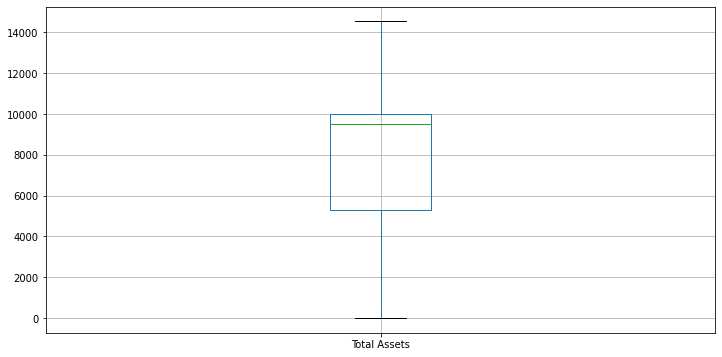

In [240]:
plt.figure(figsize=(12,6))
df[df['Total Assets'] < 15000].boxplot('Total Assets')
plt.show()

- A maior parte dos projetos tem até 15000 NFTs.

In [241]:
df_assets = df[df['Total Assets'] < 15000]
df_assets['Total Assets'].describe()

count      111.000000
mean      7788.009009
std       3239.381132
min          3.000000
25%       5275.000000
50%       9500.000000
75%      10000.000000
max      14533.000000
Name: Total Assets, dtype: float64

####Visualização de dados:

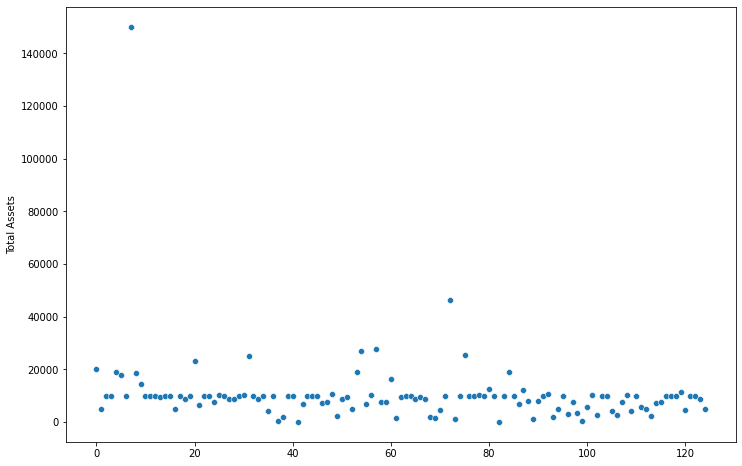

In [242]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Total Assets'])

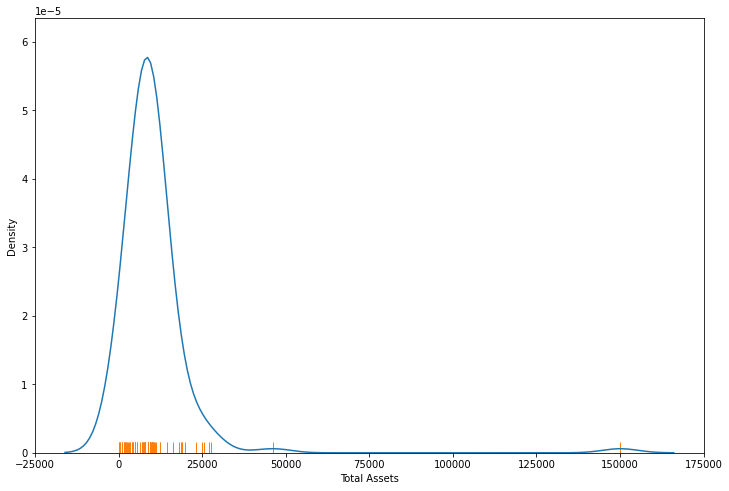

In [243]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Total Assets'])
sns.rugplot(df['Total Assets'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


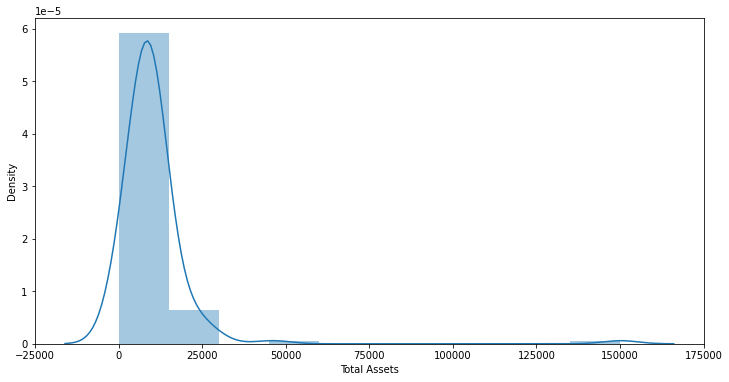

In [244]:
plt.figure(figsize=(12,6))
sns.distplot(df["Total Assets"], bins=10)

- Visualizações com filtragem feita:

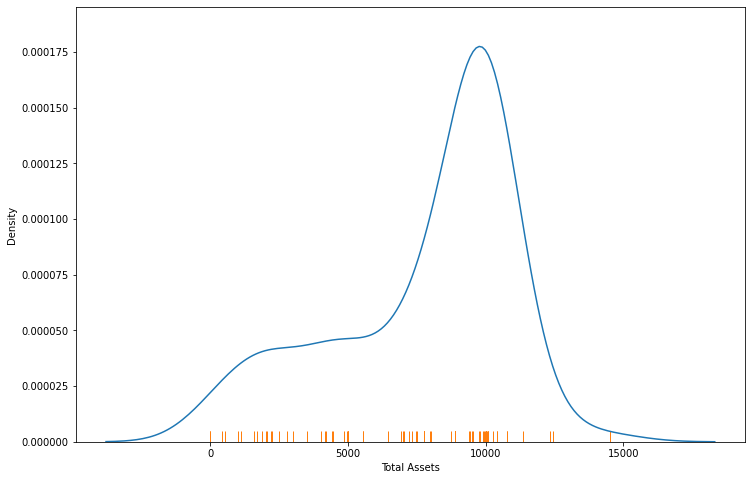

In [245]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_assets['Total Assets'])
sns.rugplot(df_assets['Total Assets'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


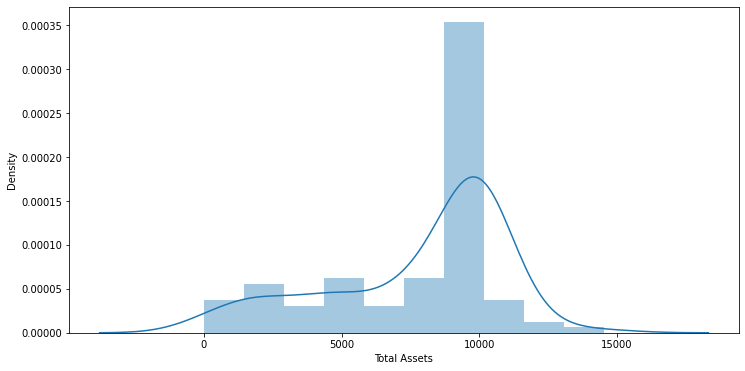

In [246]:
plt.figure(figsize=(12,6))
sns.distplot(df_assets["Total Assets"], bins=10)

###Owner Ratio:

In [247]:
df['Owner Ratio'].describe()

count      125.000000
mean       902.138563
std       8513.367817
min          2.770905
25%         30.528369
50%         39.736993
75%         50.933333
max      94866.666667
Name: Owner Ratio, dtype: float64

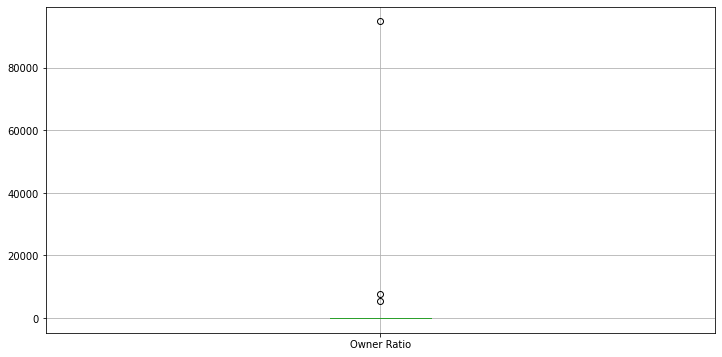

In [248]:
plt.figure(figsize=(12,6))
df.boxplot('Owner Ratio')
plt.show()

- Poucos outliers com considerações fortes.

In [249]:
df_ratio = df[df['Owner Ratio'] < 2500]
df_ratio

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,Meebits,2.93000,-7.5,58600.00,11006.79,5750.0,0.0,20000.0,28.750000
1,dotdotdots,0.19400,-10.7,944.78,5342.72,2654.0,0.2,4870.0,54.496920
2,Azuki,14.00000,-8.2,140000.00,809.84,5407.0,0.1,10000.0,54.070000
3,Bored Ape Yacht Club,93.00000,-10.1,930000.00,708.88,6312.0,-0.0,10000.0,63.120000
4,CloneX,13.45555,-15.0,254027.33,704.94,8308.0,0.2,18879.0,44.006568
...,...,...,...,...,...,...,...,...,...
120,Dark Super Bunnies,0.01900,-82.5,83.77,0.1,1738.0,-0.1,4409.0,39.419369
121,Generative Masks,0.08000,-22.4,799.92,0.1,3461.0,0.2,9999.0,34.613461
122,Dope Shibas,0.01110,-55.8,109.88,0.09,4002.0,0.1,9899.0,40.428326
123,Angry Apes United,0.03500,-7.8,311.08,0.06,4944.0,0.0,8888.0,55.625563


In [250]:
df_ratio['Owner Ratio'].describe()

count    122.000000
mean      39.230369
std       15.310939
min        2.770905
25%       30.381525
50%       39.409685
75%       50.773747
max       78.225441
Name: Owner Ratio, dtype: float64

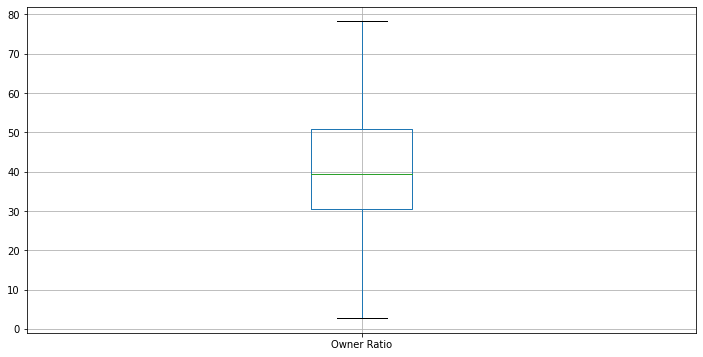

In [251]:
plt.figure(figsize=(12,6))
df_ratio.boxplot('Owner Ratio')
plt.show()

#4ºParte: Analisando as relações do início:

##Premissas:

1. O market cap é o que entenderíamos pela receita total do projeto.  No entanto, muitos indicadores (incluindo a coingecko), simplesmente multiplicam a quantidade de NFTs (total assets) pelo preço do NFT mais baixo (floor price), o que significa que não é exatamente confiável. O market cap é o melhor parâmetro para entender o crescimento do projeto a longo prazo e o seu sucesso, porém, como tudo em finanças, não é uma medida exata, existem diversos outros fatores que garantem o sucesso de um projeto.

2. Podemos considerar, por ser os top projetos NFTs, que eles deram sold out, ou seja, eles foram completamente vendidos. Por que isso é relevante? Quando um projeto tem todos seus NFTs vendidos, ele é considerado um bom projeto e o seu floor price se estabiliza, na maioria das vezes. Não é incomum um projeto estar completamente vendido.

3. Como busco identificar quais projetos se destacam de alguma maneira e quais indicadores a maior parte dos projetos possuem, as colunas que devem ser ressaltadas são: o floor price, market cap e owners (preço de "chão" (preço do NFT mais barato), receita do projeto e os proprietários).


##Hipóteses e demonstrações:


###O market cap é verdadeiro?

- Muitos sites são conhecidos por não apresentar um market cap correto. O que posso fazer para verificar essa informação? Sei que, no mínimo, o market cap vai ser maior do que Total_assets (total de ativos) multiplicado floor_price (o preço do NFT mais baixo do projeto). 

In [252]:
total_assets = []
floor_price = []

for price in df['Floor Price']:
  floor_price.append(price)

for asset in df['Total Assets']:
  total_assets.append(asset)


In [253]:
makt_caps = []
for i in range(len(total_assets)):
  makt_cap = floor_price[i]*total_assets[i]
  makt_caps.append(makt_cap)

In [254]:
makt_caps2 = []
for makt_cap in df['Market Cap']:
  makt_caps2.append(makt_cap)

In [255]:
larger = []
equal = []
smaller = []

flag=0
for i in range(len(makt_caps)):
  if makt_caps[i] == makt_caps2[i]:
    flag = 1
    equal.append(flag)
  elif makt_caps[i] > makt_caps2[i]:
    flag = 2
    equal.append(flag)
  elif makt_caps[i] < makt_caps2[i]:
    flag = 3
    smaller.append(flag)

- As flags indicam se o market cap do dataset é igual, menor ou maior que a multiplicação dos ativos totais do projeto com o floor price.

In [256]:
print(len(equal), len(smaller), len(larger))

101 24 0


- Aqui temos as relações. No dia 10/02, encontrei nenhum market cap maior que a multiplicação e inclusive, 19 marketcaps eram menores do que a relação floor_price * total_assets, o que indica que ele é *menor* do que o mínimo esperado. Portanto, o que indica que essa coluna não é verídica. No entanto, é importante ressaltar que não é um dado descartável visto que a maior parte (106) dos market caps indicam o market cap *mínimo*. O que podemos saber é que ele não é o verdadeiro market cap do projeto.

###Relações do floor price:

In [257]:
df_fp = pd.DataFrame([df['Floor Price'], df['Market Cap']])

In [258]:
df_fp = df_fp.transpose()

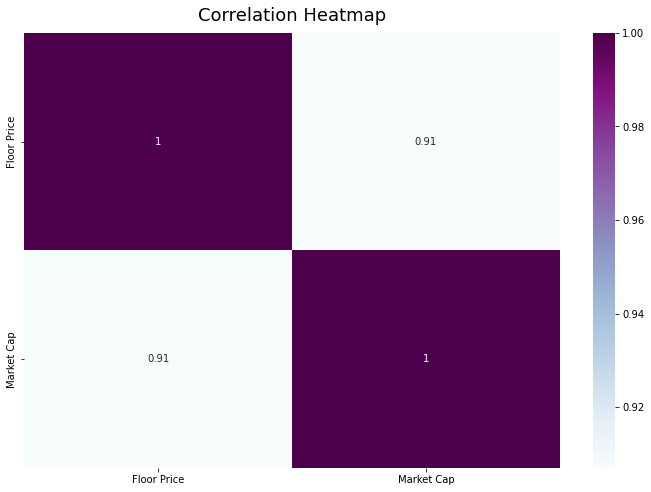

In [259]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df_fp.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Essa informação é importante, um alto indice de correlação, mas não é uma informação vital visto o que foi demonstrado acima.

###Quanto mais ativos, mais proprietários terá o projeto?

In [260]:
df2 = pd.DataFrame([df['Owners'], df['Total Assets']])

In [261]:
df2.transpose().describe()

,Owners,Total Assets
count,125.000000,125.000000
mean,3927.408000,10549.976000
std,3701.997761,14011.583941
min,56.000000,3.000000
25%,2084.000000,6942.000000
50%,3405.000000,9999.000000
75%,5045.000000,10000.000000
max,32794.000000,150072.000000


In [262]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
Owners,5750.0,2654.0,5407.0,6312.0,8308.0,11761.0,440.0,19758.0,10567.0,3358.0,3391.0,6041.0,5158.0,3000.0,5073.0,3577.0,2441.0,5349.0,4827.0,5444.0,8286.0,299.0,3290.0,4759.0,3942.0,5045.0,3770.0,1372.0,5036.0,2900.0,5213.0,8668.0,6122.0,4520.0,6216.0,2097.0,519.0,32794.0,56.0,6899.0,...,3012.0,2758.0,4184.0,3414.0,539.0,3960.0,3750.0,4291.0,1118.0,2084.0,1064.0,1863.0,2910.0,1390.0,293.0,2616.0,5099.0,1373.0,3838.0,3723.0,1533.0,920.0,2851.0,2792.0,1840.0,2700.0,813.0,1507.0,1146.0,3235.0,2271.0,3541.0,5112.0,2573.0,683.0,1738.0,3461.0,4002.0,4944.0,1930.0
Total Assets,20000.0,4870.0,10000.0,10000.0,18879.0,17961.0,10000.0,150072.0,18584.0,14533.0,9999.0,10000.0,9933.0,9500.0,10000.0,10000.0,5000.0,10000.0,8888.0,10000.0,23204.0,6459.0,10000.0,9757.0,7776.0,10080.0,10000.0,8888.0,8888.0,10000.0,10255.0,24999.0,10000.0,8733.0,10000.0,4169.0,10000.0,421.0,2021.0,10000.0,...,10000.0,7000.0,12345.0,7977.0,1024.0,8008.0,9999.0,10762.0,2048.0,4950.0,10000.0,3000.0,7777.0,3498.0,526.0,5550.0,10419.0,2799.0,10000.0,9999.0,4196.0,2500.0,7777.0,10100.0,4027.0,9999.0,5555.0,5000.0,2250.0,7335.0,7487.0,10000.0,10000.0,10000.0,11357.0,4409.0,9999.0,9899.0,8888.0,5000.0


In [263]:
df2 = df2.transpose()

In [264]:
df2

,Owners,Total Assets
0,5750.0,20000.0
1,2654.0,4870.0
2,5407.0,10000.0
3,6312.0,10000.0
4,8308.0,18879.0
...,...,...
120,1738.0,4409.0
121,3461.0,9999.0
122,4002.0,9899.0
123,4944.0,8888.0


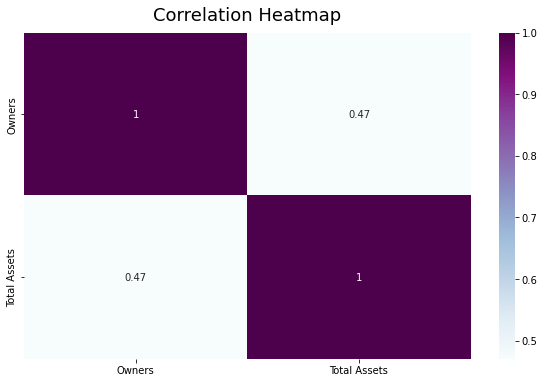

In [265]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df2.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Correlação forte! Não necessariamente um projeto terá mais proprietários quando se tem mais ativos, visto que um projeto pode ter muitos ativos e poucos donos - o que indicaria, muito provavelmente, que os ativos estão em um preço baixo, mas com expectativa de lucro. 

- Se o projeto tem muitos ativos e muitos donos, é muito provável que o preço esteja razoalvemente equilibrado na proporção entre os dois. Essa relação é espelhada na coluna owners_ratio.

###Há alguma relação entre o market cap e o total de ativos?

In [266]:
df3 = pd.DataFrame([df['Market Cap'], df['Total Assets']])

In [267]:
df3 = df3.transpose()

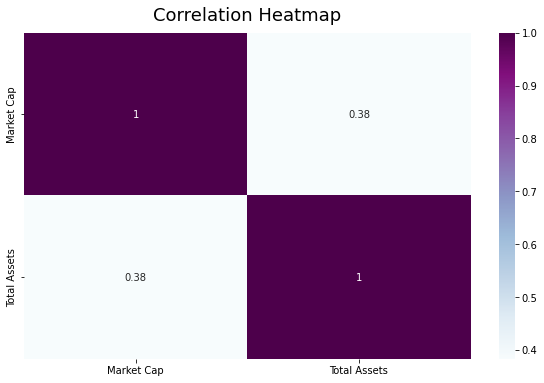

In [268]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df3.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Resposta: não é uma correlação forte, mas existe um indicativo. Não necessariamente quanto mais ativos, mais receita aquele projeto terá.

###Correlacionando o proprietários, total de ativos e market cap:

In [269]:
df4 = pd.DataFrame([df['Owners'], df['Total Assets'], df['Market Cap']])

In [270]:
df4 = df4.transpose()

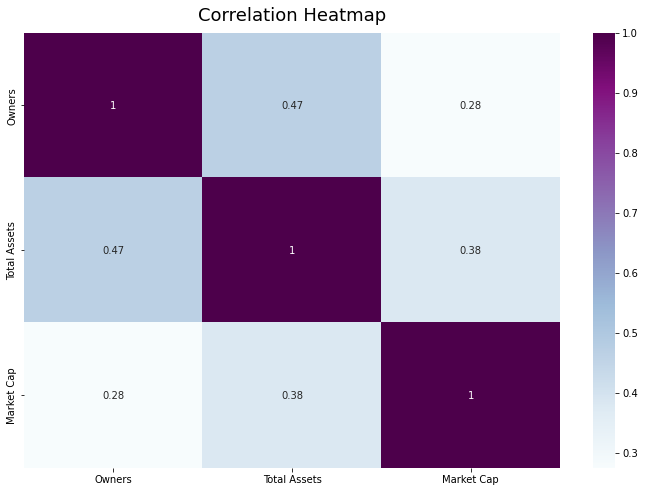

In [271]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df4.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Como podemos observar, a interação nova é entre proprietários e market cap

###O que o market cap e o owners indicam?

In [272]:
df5 = pd.DataFrame([df['Owners'], df['Market Cap']])
df5 = df5.transpose()

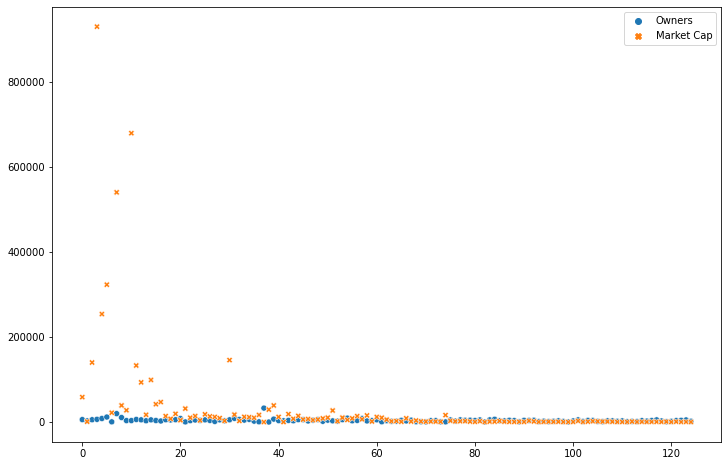

In [273]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df5)

##Conclusões


1. É importante notar que como essa análise é dinâmica, 
muitas vezes os números indicados serão completamente diferentes 
por questões de flutuação de mercado. Nesse sentido, tentei fazer 
uma análise das relações de forma a priori, respaldadas pelos 
projetos principais da opensea de fevereiro, daqui a uma semana ou 
um mês ou um ano serão completamente diferentes.

2. Os dados acerca do floor price estão concentrados por volta de 0 e 5 ETH. O que nos indica lançamentos baixos, exceto por alguns outliers discrepantes.

3. A conclusão é que o Market Cap se mantém estável de um modo geral para a maior partes dos projetos tirando alguns Outliers acima de 20.000, ou ainda, podemos  considerar que os Outliers se comprometem bastante acima do 3º Quartil (75%): 13587.1 ETH. Ainda mais quando se considera que a mediana é 2179 ETH, podemos entender que a maior parte dos projetos deve estar por volta desse valor.

4. Importante: Diante dos gráficos, conseguimos compreender que ainda existe uma 
boa dispersão acima de por volta de 3000 ETH de market cap. Os projetos acima disso são os que devem ter uma atenção interessante para um investidor.

- Os proprietários do NFTs obedecem uma métrica muito mais concisa. O que isso nos indica? 

5. O fato é que um proprietário pode ter muitos NFTs e não possuímos esse número somente com essa feature. No entanto,  o que podemos inferir é que os projetos que possuem muitos proprietários:Estão completamente vendidos ou quase completamente.Esses NFTs têm um preço baixo ou o projeto tem muita fama. Os projetos que têm poucos proprietários ou têm um preço alto ou têm pouco sucesso.

6. A média de totais de NFTs (total assets) dos projetos é 7796. A maior parte dos projetos, no entanto se concentra em 9409 ~ 10.000 NFTs.

7. No dia 10/02, encontrei nenhum market cap maior que a multiplicação entre floor price e market cap.Portanto, o que indica é que essa coluna não é verídica. O interessante é notar que isso baliza o investidor por baixo, sabemos que a receita do projeto é, no mínimo, o market cap indicado no dataset.

8. Não necessariamente um projeto terá mais proprietários quando se tem mais ativos, visto que um projeto pode ter muitos ativos e poucos donos - o que indicaria, muito provavelmente, que os ativos estão em um preço baixo, mas com expectativa de lucro.

9. Se o projeto tem muitos ativos e muitos donos, é muito provável que o preço esteja razoalvemente equilibrado na proporção entre os dois. Essa relação é espelhada na coluna owners_ratio.

#Esses pontos foram colhidos através da observação dos gráficos e dos parâmetros estatísticos. Eles auxiliam algumas coisas em relação as perguntas iniciais:

1. Primeiro pergunta: Diante do que foi escolhido, e tomado como premissa, certamente o market cap é essencial. Percebemos também que o floor price é essencial para um investidor visto como a open sea e a coingecko (por consequência) o tomam como baliza mínima de valor. A quantidade de proprietários é essencial para compreendermos o quanto aquele projeto é atraente, no entanto, nada nos indica que quanto mais proprietários, mais valorizado é aquele projeto, para isso é preciso analisar em conjunto com o price floor e o market cap.

2. Como demonstrei, o market cap é associado ao price floor e a quantidade total de NFTs em um projeto (total assets). Também é interessante notar o owner ratio, que nos mostra o quanto aquele projeto tem em termos de proporção de proprietários e ativos do projeto e como isso é significativo para saber o quão populoso é um projeto. A partir disso, podemos balizar também pela média de NFTs de um projeto. Acredito que isso é interessante de se comparar, se determinado projeto tá acima ou baixo da média em relação à quantidade de NFTs ofertados e relacionar isso com o owner ratio.

3. Isso é um toque mais pessoal que o dataset não fornece de maneira alguma. O que podemos inferir do dataset é quais projetos valem a pena se aprofundar quanto a essa questão. Para além de questões puramente matemática e financeiras, a questão gira em torno de o quão aquele projeto é sustentável de um ponto de vista tecnológico e de constituição de comunidade.